In [1]:
import numpy as np
import rnn as rnn
import importlib

# Exercise 1: Implement and train a vanilla RNN
## 0.1 Read in the data
attributes: book_data, book_chars, vocab_len, char_to_ind, ind_to_char

In [2]:
importlib.reload(rnn)
book_fname = '../Dataset/goblet_book.txt'
data = rnn.TextData(book_fname)
data.vocab_len

80

## 0.2 Set hyper-parameters & initialize the RNN's parameters

In [34]:
importlib.reload(rnn)
net = rnn.RNN()
net.W

array([[-0.00033025, -0.0050365 , -0.00172375, ...,  0.01162574,
         0.00435546,  0.00166485],
       [-0.02396082, -0.0067898 , -0.00480574, ...,  0.02077343,
         0.02206469,  0.0007965 ],
       [-0.03836656,  0.01236832, -0.00540376, ...,  0.00377263,
        -0.00187227,  0.01032658],
       ...,
       [-0.00182315,  0.00106435,  0.01268359, ...,  0.01896604,
        -0.00044599, -0.00705985],
       [ 0.01168769,  0.0005523 , -0.00348308, ...,  0.00994518,
        -0.0069733 , -0.00300835],
       [-0.00616148, -0.00392675, -0.01031827, ...,  0.00785255,
        -0.01149305,  0.01031416]])

## 0.3 Synthesize text from your randomly initialized RNN

In [70]:
importlib.reload(rnn)
net = rnn.RNN()
h0 = np.zeros((net.m, 1))
txt = net.synthesize_text(h0, 2, 9, True)
txt

'U-D\nywHol'

## 0.4 Implement the forward & backward pass of back-prop

In [4]:
seq_length = 25
m = 100
h0 = np.zeros((m, 1))
X_chars = data.book_data[:seq_length]
Y_chars = data.book_data[1:seq_length+1]

### One hot encode data

In [5]:
importlib.reload(rnn)
_, X_train = data.one_hot_encode_X(X_chars)
y_train, _ = data.one_hot_encode_X(Y_chars)
X_train.shape

(25, 80, 1)

In [7]:
y_train.shape

(25,)

### Forwardpass

In [9]:
importlib.reload(rnn)
net = rnn.RNN()
loss = net.forward_pass(h0, X_train, y_train)
loss

109.54593130164336

### Backwardpass

In [11]:
importlib.reload(rnn)
net = rnn.RNN()
loss = net.forward_pass(h0, X_train, y_train)
net.backward_pass(X_train, y_train)

In [12]:
importlib.reload(rnn)
net = rnn.RNN()
loss, h = net.back_propagation(h0, X_train , y_train)
loss

109.54593130164336

### Check gradients

In [19]:
importlib.reload(rnn)
net = rnn.RNN()
net.check_gradients(X_train, y_train, h0)

Gradient checks:
The maximum relative error for the W gradient is: 9.444390e-06.
The maximum relative error for the U gradient is: 2.965983e-07.
The maximum relative error for the V gradient is: 2.748042e-05.
The maximum relative error for the b gradient is: 2.023117e-06.
The maximum relative error for the c gradient is: 6.354765e-09.



## 0.5 Train your RNN using AdaGrad

  0%|          | 0/4 [00:00<?, ?it/s]Iter=0 | smooth loss=109.54593130164336
Synthetized text | :sYq-Gb WDnü)DG"NNSD;THWWJ D(A	D0N,6S30dcSm(eD	RZ2!vA(v)d4YZKnmRlB)H zUb.IVz"1(A Gfgatgx hNdN^} üihz2b0sZeO7rVy71iEJxUW79-Ta3Pe'f"0To:1?R r G2hNB.}k?ElsdOOK3yUIuRg.HVCO4B,(1Ra2'fNX-RJ/ueRk c1BtNUT((tR
Iter=100 | smooth loss=108.85645727692905
Iter=200 | smooth loss=106.41454286672374
Iter=300 | smooth loss=103.72932006747881
Iter=400 | smooth loss=101.123751798063
Iter=500 | smooth loss=99.0539932427996
Synthetized text | t w weiM, oe  henis s,.ei llise.  fed dh olehug d, qhuhuofa acs o th h co, y t r,owe"ct Mnee timowi, nd .atn Ws. tssha.l iC hdof p wc nmoe.n a rlt.
shene ea c	rurnouaese edatc I, rs e bdet moiit c sto
Iter=600 | smooth loss=96.96590835808564
Iter=700 | smooth loss=94.91010926298442
Iter=800 | smooth loss=92.66745369581807
Iter=900 | smooth loss=90.76250726739327
Iter=1000 | smooth loss=88.78627856009395
Synthetized text |  ce s	nnw
et H.Losl ib'h hos tbet -,ay yhtth t briBG

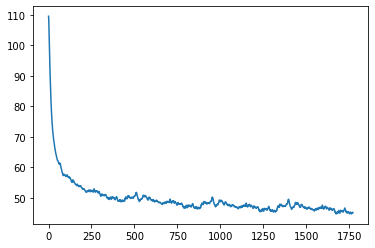

In [33]:
importlib.reload(rnn)
net = rnn.RNN()
syn_text = net.train_rnn(epochs=4, n=200, eta=.1, verbose=True, backup=True)

In [39]:
syn_text[10000]

{'loss': 57.21674991241652,
 'text': '" yint rpirs and yout it Rachoungafh it werm- the certarack dor"\n"Sowk.\n. clouss the d of fone  veimed tellry. "Weurry Has. Wounrerse cons nerol, and salve aing ofltats. ssioghitry,, arfrooy.\n-it mnes'}

In [43]:
for i in range(0, 100001, 10000):
    print(f'Iter={i} | smooth loss = {syn_text[i]["loss"]}')
    print('\\texttt{', syn_text[i]["text"], '}')
    print()

Iter=0 | smooth loss = 109.54593130164336
\texttt{ :sYq-Gb WDnü)DG"NNSD;THWWJ D(A	D0N,6S30dcSm(eD	RZ2!vA(v)d4YZKnmRlB)H zUb.IVz"1(A Gfgatgx hNdN^} üihz2b0sZeO7rVy71iEJxUW79-Ta3Pe'f"0To:1?R r G2hNB.}k?ElsdOOK3yUIuRg.HVCO4B,(1Ra2'fNX-RJ/ueRk c1BtNUT((tR }

Iter=10000 | smooth loss = 57.21674991241652
\texttt{ " yint rpirs and yout it Rachoungafh it werm- the certarack dor"
"Sowk.
. clouss the d of fone  veimed tellry. "Weurry Has. Wounrerse cons nerol, and salve aing ofltats. ssioghitry,, arfrooy.
-it mnes }

Iter=20000 | smooth loss = 52.81495835390734
\texttt{ .  Med. Hary ons.  Powel hey Relt at heor.  Homfire waurl, it in.  He cougatest weres - scathint Yated scop the ons seed gumcerty anstry, elou'n yy.  Sakk'n thoup t is a bee dienta arizef in at and mo }

Iter=30000 | smooth loss = 51.139547928231586
\texttt{ es yound companger and siny  paullxbatall dom be tot his tand Crop?- that and chan bovesel so the of bun'gryu on's sempee pemcofad.
"Al?  Ulen? EFrer. . . Heate gowh- of talw